In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
def create_data(data_num=100):
    np.random.seed(21)
    x1=np.random.normal(1,0.2,data_num)
    x2=np.random.normal(2,0.2,data_num)
    x=np.append(x1,x2)
    y=np.array([0]*data_num+[1]*data_num)
    return x,y


In [5]:
X,y=create_data(1000)


In [8]:
X #查看X的数据





array([0, 0, 0, ..., 1, 1, 1])

In [9]:
y #查看y的数据

array([0, 0, 0, ..., 1, 1, 1])

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.3,random_state=16)


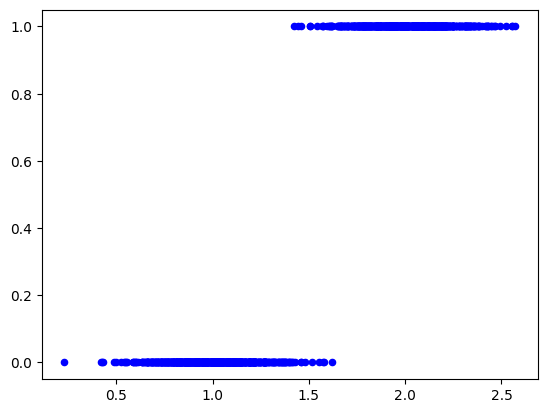

In [11]:
plt.scatter(X_train,y_train,color='blue',s=20)
plt.show()


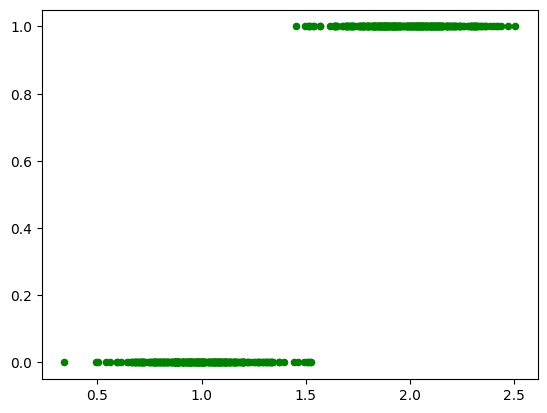

In [12]:
plt.scatter(X_test,y_test,color='g',s=20)
plt.show()


In [13]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
##模型搭建

In [14]:
X_train=X_train.reshape(-1,1)
model.fit(X=X_train,y=y_train)
LogisticRegression() #上述两行代码运行的输出
##—X:输入特征，如果输入是np.array格式，shape必须是(n_sample,n_feature)。
###—Y:输入标签。

LogisticRegression()

In [15]:
X_test=X_test.reshape(-1,1)
y_test_pred=model.predict(X=X_test)# 默认阀值为0.5
y_test_pred_proba=model.predict_proba(X=X_test) # 可以自定义阀值，比如自定义阀值0.6


In [16]:
def thes_func(x):
    thes=0.6
    return 1 if x>thes else 0
y_test_pred_thes=list(map(thes_func,y_test_pred_proba[:,1]))
##取阀值判断概率的二分类结果

In [25]:
w,b=model.coef_[0],model.intercept_
print('Weight={0}bias={1}'.format(w,b))
Weight=[9.53805539]
bias=[-14.3705638] # print的输出结果


Weight=[9.53805539]bias=[-14.3705638]


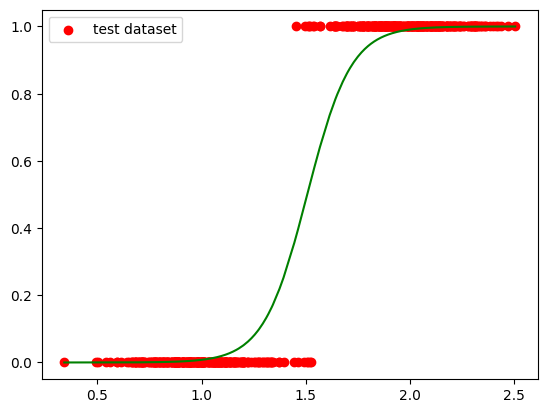

In [26]:
from scipy.special import expit
X_train=X_train.reshape(-1)
X_test=X_test.reshape(-1)
sigmoid=expit(np.sort(X_test)*model.coef_[0]+model.intercept_)
plt.plot(np.sort(X_test),sigmoid,color='g')
plt.scatter(X_test,y_test,color='r',label='test dataset')
plt.legend()
plt.show()


In [27]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_true=y_test,y_pred=y_test_pred)
print('Accuracy:{}'.format(acc))
Accuracy:0.9916666666666667 # print输出的结果


Accuracy:0.9916666666666667
